# Import libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
import nltk
nltk.download('stopwords')
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import nltk
nltk.download('punkt')
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Import dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
real = pd.read_csv("/content/gdrive/My Drive/NLP/Dataset/True.csv")
fake = pd.read_csv("/content/gdrive/My Drive/NLP/Dataset/Fake.csv")

# Data Visualization

In [ ]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
 for key,count in fake.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")
    
print(f"Total Records:\t{fake.shape[0]}")

News:	9050
politics:	6841
left-news:	4459
Government News:	1570
US_News:	783
Middle-east:	778
Total Records:	23481


# Categories of news articles

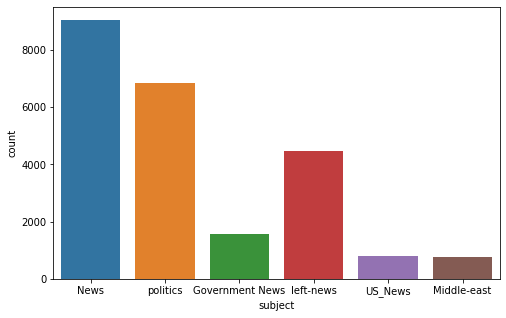

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot("subject", data=fake)
plt.show()

# Word cloud for fake articles

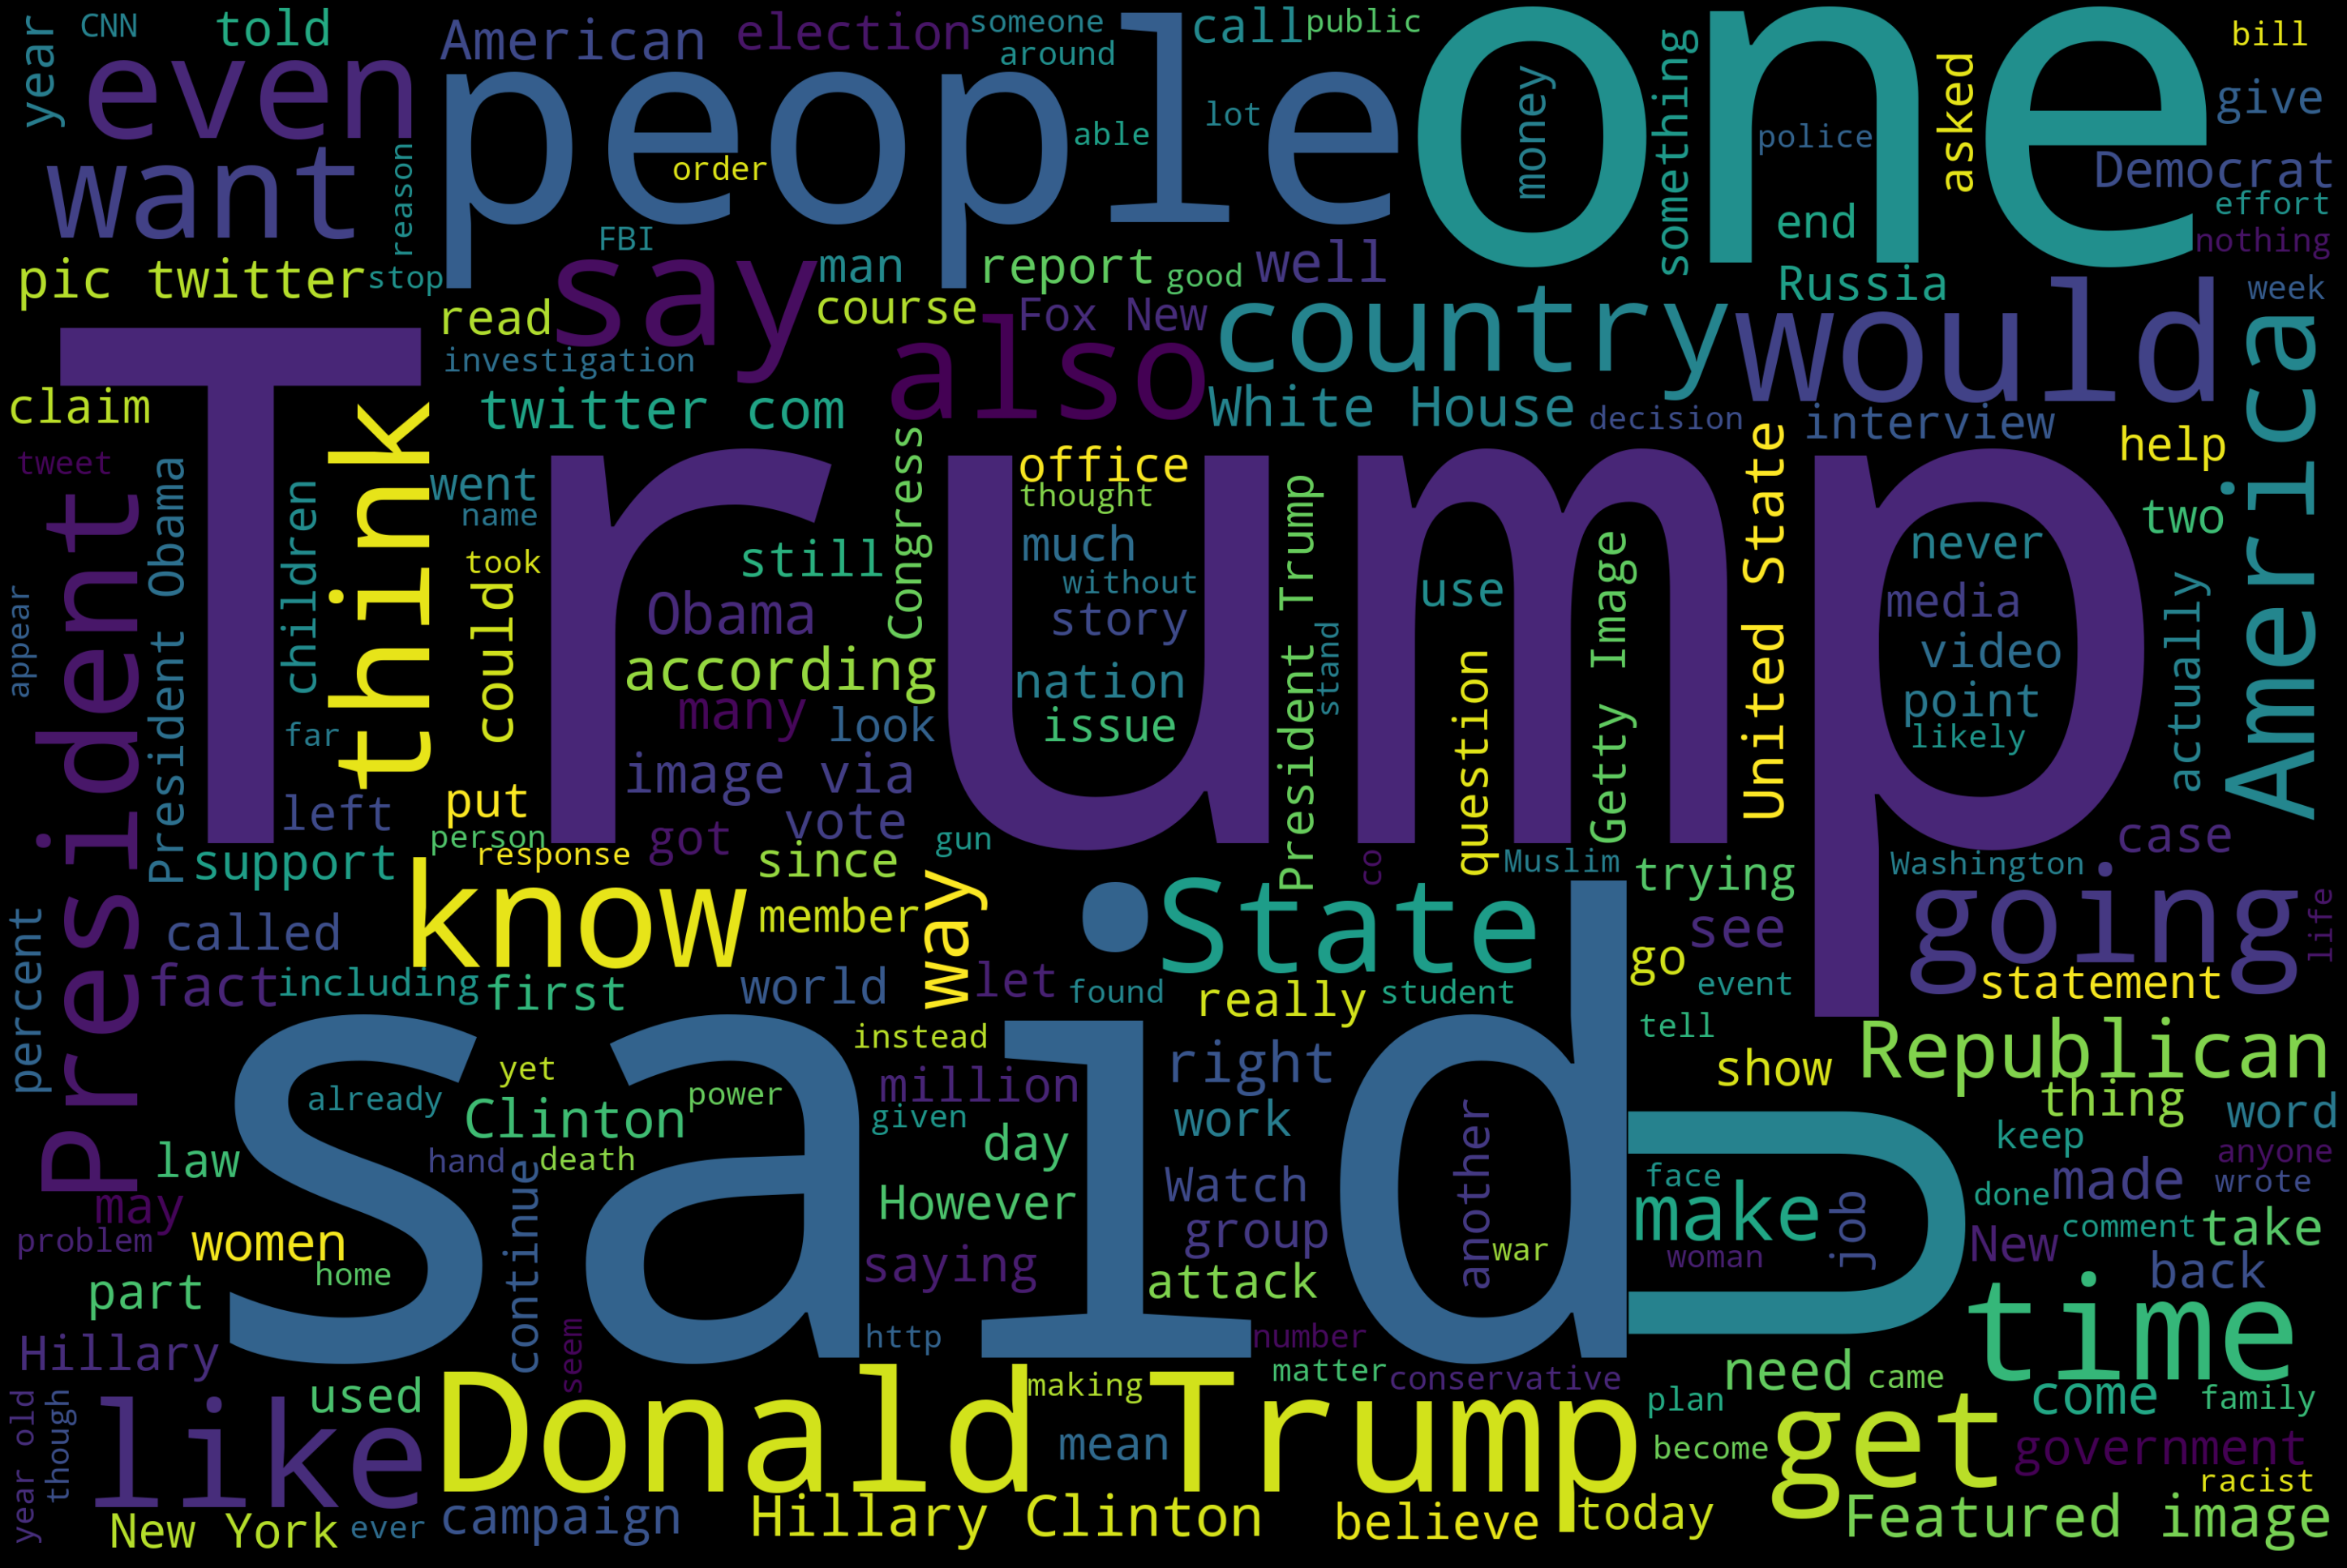

In [ ]:
text = ''
for news in fake.text.values:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text


In [ ]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


# Data cleaning

In [ ]:
unknown_publishers = []
for index,row in enumerate(real.text.values):
    try:
        record = row.split(" -", maxsplit=1)
        
        record[1]
        
        assert(len(record[0]) < 260)
    except:
        unknown_publishers.append(index)

In [ ]:
real.iloc[unknown_publishers].text

3488     The White House on Wednesday disclosed a group...
4358     Neil Gorsuch, President Donald Trump’s appoint...
4465     WASHINGTON The clock began running out this we...
5784     Federal appeals court judge Neil Gorsuch, the ...
6660     Republican members of Congress are complaining...
6823     Over the course of the U.S. presidential campa...
7922     After going through a week reminiscent of Napo...
8194     The following timeline charts the origin and s...
8195     Global health officials are racing to better u...
8247     U.S. President Barack Obama visited a street m...
8465     ALGONAC, MICH.—Parker Fox drifted out of the D...
8481     Global health officials are racing to better u...
8482     The following timeline charts the origin and s...
8505     Global health officials are racing to better u...
8506     The following timeline charts the origin and s...
8771     In a speech weighted with America’s complicate...
8970                                                    

In [ ]:
real.iloc[8970]

title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

In [ ]:
publisher = []
tmp_text = []
for index,row in enumerate(real.text.values):
    if index in unknown_publishers:

        tmp_text.append(row)
        
        publisher.append("Unknown")
        continue
    record = row.split(" -", maxsplit=1)
    publisher.append(record[0])
    tmp_text.append(record[1])

In [ ]:
real["publisher"] = publisher
real["text"] = tmp_text

del publisher, tmp_text, record, unknown_publishers

In [ ]:
real.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fi...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links be...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos to...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Pos...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [ ]:
[index for index,text in enumerate(real.text.values) if str(text).strip() == '']

[8970]

In [ ]:
real = real.drop(8970, axis=0)

In [ ]:
empty_fake_index = [index for index,text in enumerate(fake.text.values) if str(text).strip() == '']
print(f"No of empty rows: {len(empty_fake_index)}")
fake.iloc[empty_fake_index].tail()

No of empty rows: 630


,title,text,subject,date
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"
21873,(VIDEO) HYSTERICAL SNL TAKE ON HILLARY’S ANNOU...,,left-news,"Apr 12, 2015"


In [ ]:
print(f"Total Records:\t{real.shape[0]}")

for key,count in real.subject.value_counts().iteritems():
  print(f"{key}:\t{count}")

Total Records:	21416
politicsNews:	11271
worldnews:	10145


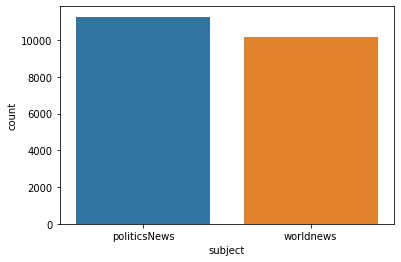

In [ ]:
sns.countplot(x="subject", data=real)
plt.show()

# Word cloud for real articles

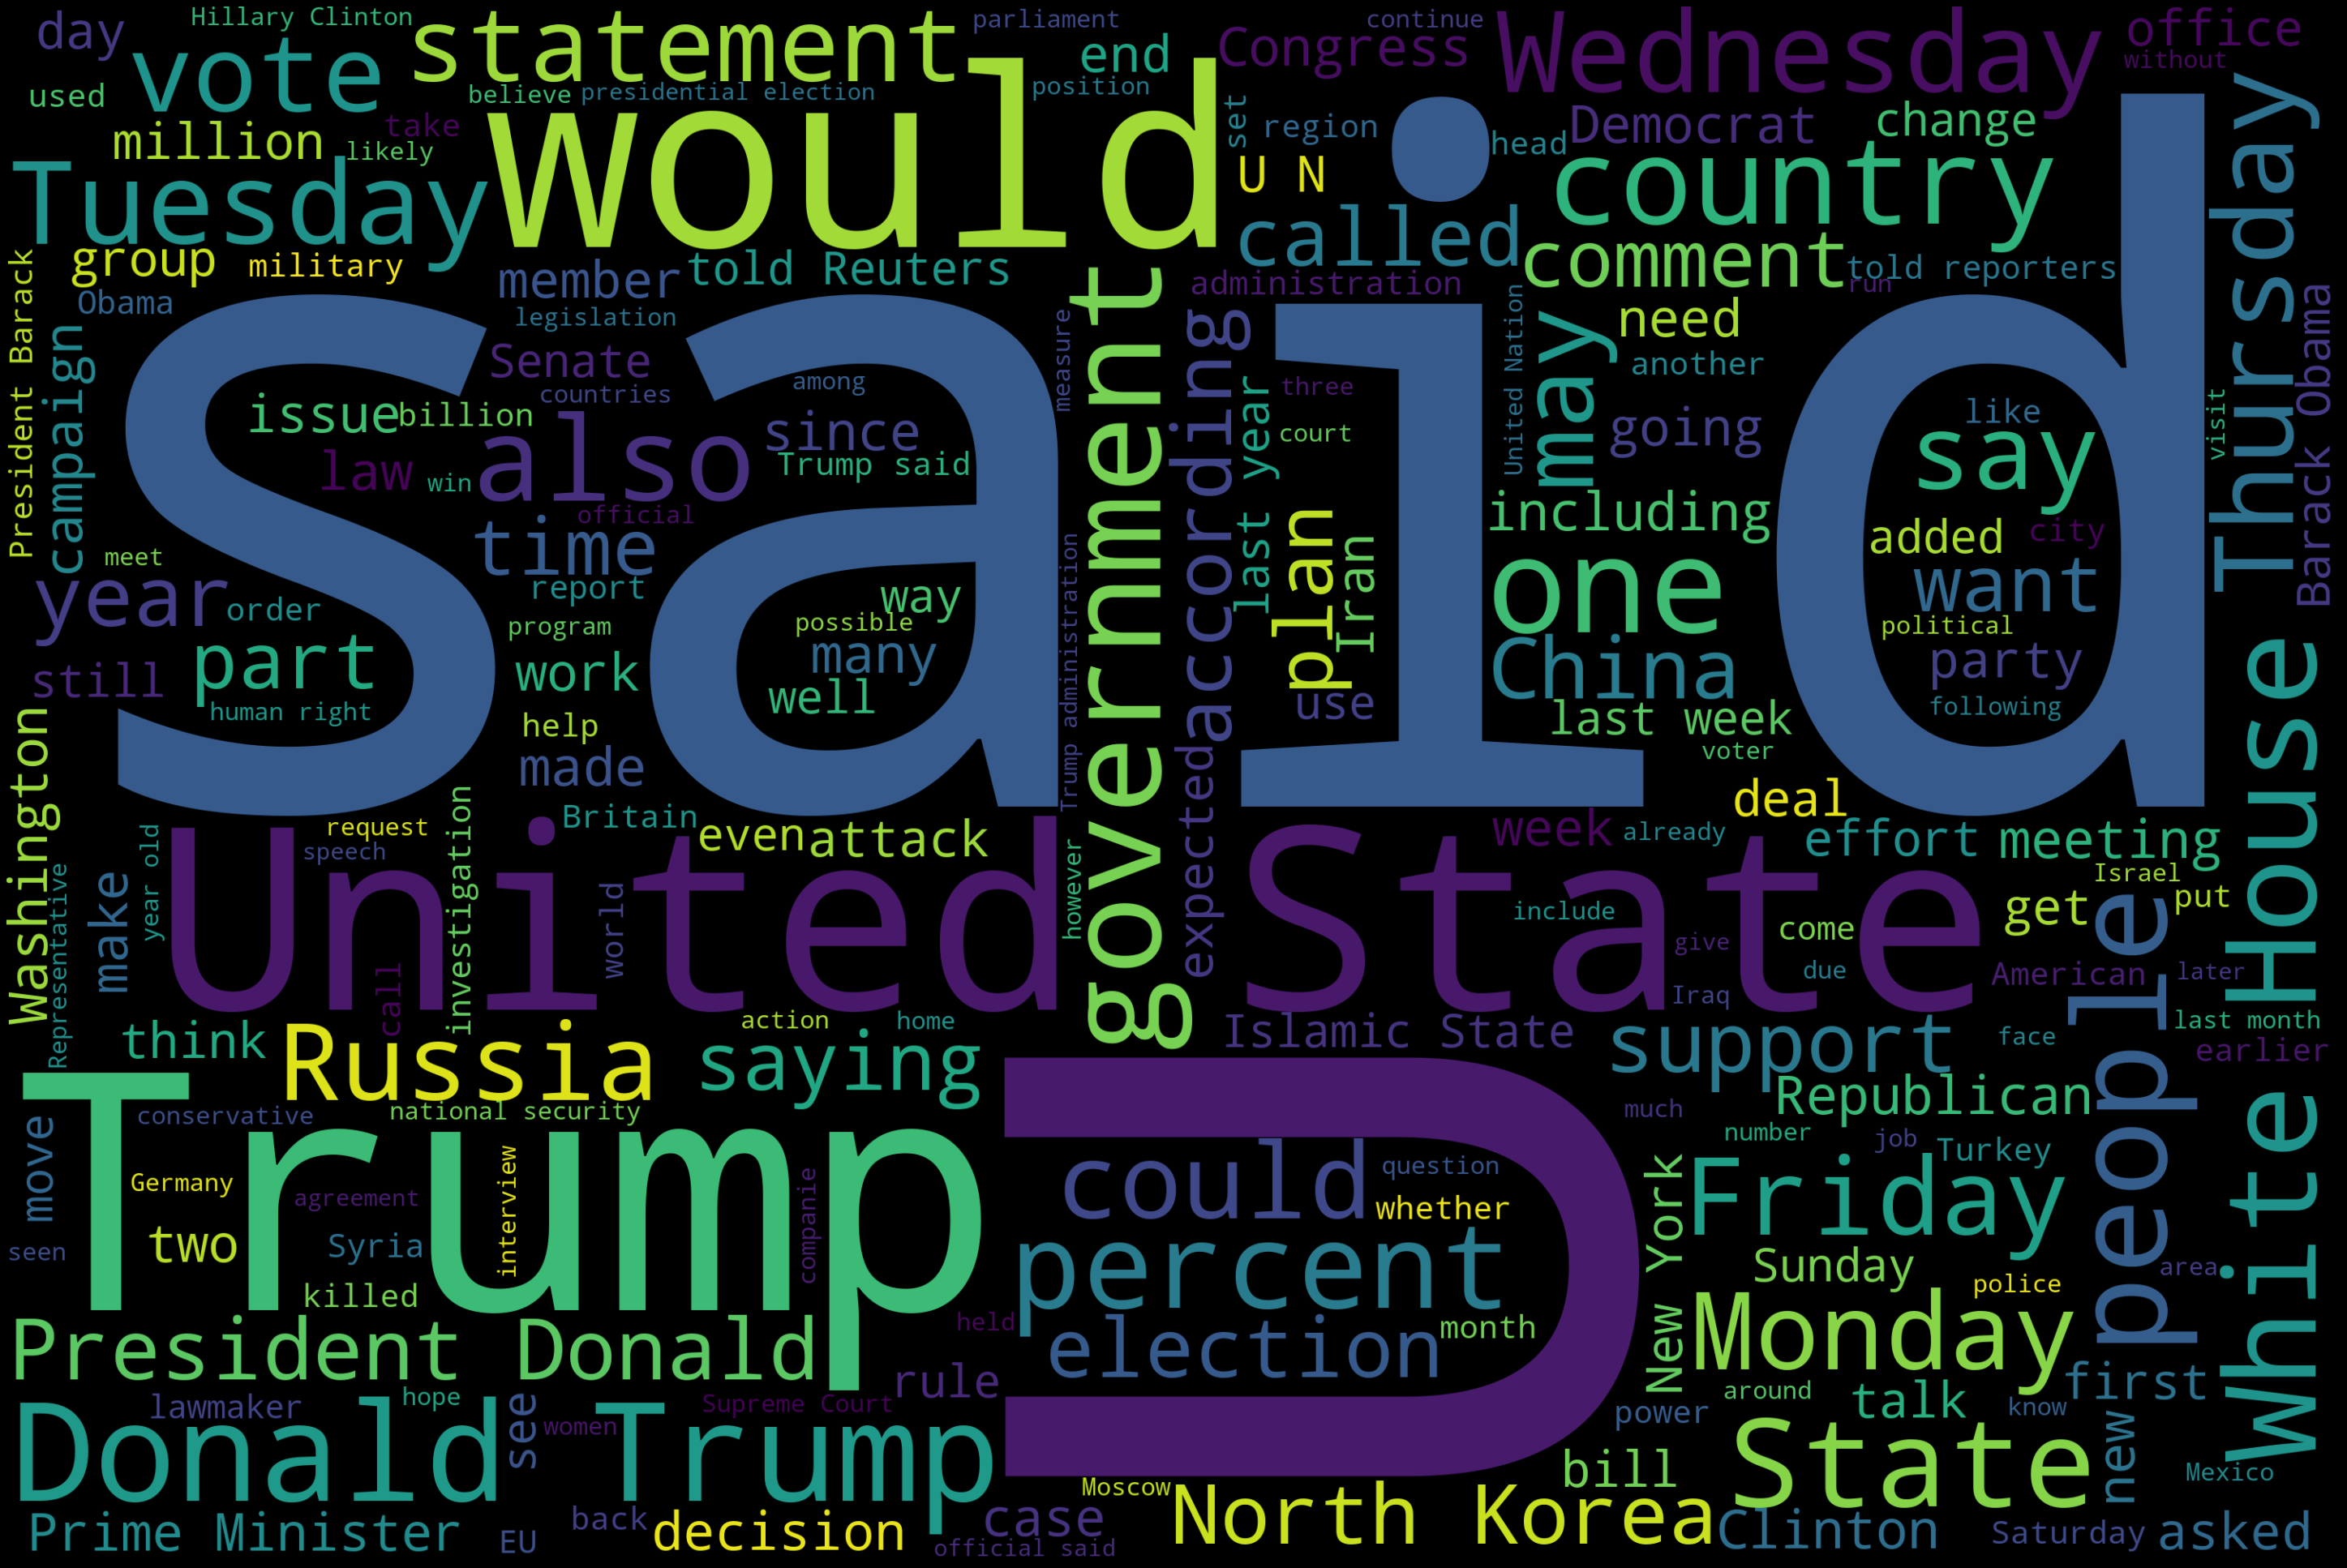

In [ ]:
text = ''
for news in real.text.values:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

# Pre-processing data

In [ ]:
real["class"] = 1
fake["class"] = 0

In [ ]:
real["text"] = real["title"] + " " + real["text"]
fake["text"] = fake["title"] + " " + fake["text"]

In [ ]:
real = real.drop(["subject", "date","title",  "publisher"], axis=1)
fake = fake.drop(["subject", "date", "title"], axis=1)

In [ ]:
data = real.append(fake, ignore_index=True)
del real, fake

# Data cleaning

In [ ]:
y = data["class"].values
X = []
stop_words = set(nltk.corpus.stopwords.words("english"))
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
for par in data["text"].values:
    tmp = []
    sentences = nltk.sent_tokenize(par)
    for sent in sentences:
        sent = sent.lower()
        tokens = tokenizer.tokenize(sent)
        filtered_words = [w.strip() for w in tokens if w not in stop_words and len(w) > 1]
        tmp.extend(filtered_words)
    X.append(tmp)

del data

# Build vectors manually

In [ ]:
import gensim

In [ ]:
EMBEDDING_DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=X, size=EMBEDDING_DIM, window=5, min_count=1)

In [ ]:
len(w2v_model.wv.vocab)

122248

# Exploring vectors

In [ ]:
w2v_model["corona"]

array([ 2.9791664e-02, -7.4101515e-02,  5.1567070e-03, -1.0126729e-03,
       -1.2374478e-02,  5.0618414e-02, -4.5970254e-02, -2.1642815e-02,
       -2.5977319e-02, -4.3268722e-02, -6.1757341e-02, -7.8610713e-03,
       -3.3872802e-02,  3.9411064e-02, -3.4681369e-02,  1.5348876e-02,
        9.3513830e-03, -4.5501716e-02, -2.4513677e-02,  1.4008061e-03,
        1.9138096e-02, -2.1603098e-02, -4.7652260e-03, -1.0346407e-02,
       -9.8318793e-03,  5.5067721e-03,  7.3357774e-03, -1.9455858e-03,
        4.0708449e-02, -1.4796736e-02, -3.3721145e-02, -3.2811249e-03,
        4.5009378e-02, -3.3136953e-02,  7.7427370e-03,  2.8992745e-03,
       -2.3171460e-02, -4.5481041e-02, -5.9227481e-02,  2.9256251e-02,
       -2.9584512e-03, -1.7326754e-02,  4.5007817e-02, -2.2139160e-02,
       -6.5798049e-05, -2.3108659e-02, -2.8815329e-02,  1.8570386e-02,
       -1.2941948e-03,  5.3686276e-02,  3.3717833e-03, -1.9916875e-02,
        2.5507554e-02,  8.7168878e-03,  1.8889761e-02, -1.6200844e-02,
      

In [ ]:
w2v_model.wv.most_similar("iran")

[('tehran', 0.8753942847251892),
 ('iranian', 0.7495293617248535),
 ('destabilizing', 0.6517279148101807),
 ('nuclear', 0.6365195512771606),
 ('hezbollah', 0.6280655860900879),
 ('iranians', 0.6186395883560181),
 ('jcpoa', 0.6175384521484375),
 ('riyadh', 0.6028668284416199),
 ('irgc', 0.596316933631897),
 ('turkey', 0.5870903134346008)]

In [ ]:
w2v_model.wv.most_similar("fbi")

[('comey', 0.7109714150428772),
 ('investigation', 0.6156731843948364),
 ('investigators', 0.6048107147216797),
 ('cia', 0.5947976112365723),
 ('mueller', 0.5825227499008179),
 ('doj', 0.5549604892730713),
 ('investigations', 0.5450310111045837),
 ('classified', 0.5379857420921326),
 ('investigated', 0.5328527092933655),
 ('leaks', 0.5320552587509155)]

In [ ]:
w2v_model.wv.most_similar("facebook")

[('instagram', 0.6757338643074036),
 ('reddit', 0.6491052508354187),
 ('fb', 0.6325052976608276),
 ('google', 0.6207584738731384),
 ('gofundme', 0.6188192963600159),
 ('ciolos', 0.5658835172653198),
 ('linkedin', 0.5658490061759949),
 ('blog', 0.5635029673576355),
 ('twitter', 0.5628775358200073),
 ('talarico', 0.5569933652877808)]

In [ ]:
w2v_model.wv.most_similar("computer")

[('computers', 0.8508480787277222),
 ('software', 0.8009337782859802),
 ('electronic', 0.7878023386001587),
 ('laptop', 0.7815475463867188),
 ('malware', 0.7740139961242676),
 ('lab', 0.7238514423370361),
 ('encrypted', 0.7198311686515808),
 ('kaspersky', 0.7189968824386597),
 ('scanning', 0.7073671817779541),
 ('servers', 0.702904224395752)]

In [ ]:
w2v_model.wv.most_similar(positive=["trump","obama", "clinton"])

[('bush', 0.5288994312286377),
 ('elect', 0.5152707695960999),
 ('hillary', 0.5000889897346497),
 ('incoming', 0.49683648347854614),
 ('cruz', 0.49215060472488403),
 ('sanders', 0.47343114018440247),
 ('americas_dad', 0.4663267433643341),
 ('course', 0.45293712615966797),
 ('crooked', 0.4444347023963928),
 ('amateur', 0.4397544860839844)]

# Tokenize words

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)

In [ ]:
word_index = tokenizer.word_index
for word, num in word_index.items():
    print(f"{word} -> {num}")
    if num == 10:
        break

trump -> 1
said -> 2
president -> 3
would -> 4
people -> 5
one -> 6
state -> 7
new -> 8
obama -> 9
also -> 10


# Fixing the input data size

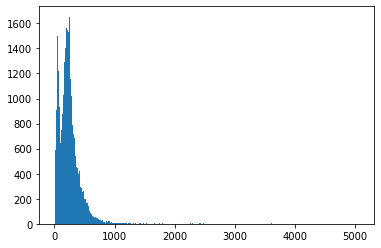

In [ ]:
plt.hist([len(x) for x in X], bins=500)
plt.show()

In [ ]:
nos = np.array([len(x) for x in X])
len(nos[nos  < 700])

43982

In [ ]:
maxlen = 700 

X = pad_sequences(X, maxlen=maxlen)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
def get_weight_matrix(model, vocab):
    
    vocab_size = len(vocab) + 1
    
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    
    for word, i in vocab.items():
        weight_matrix[i] = model[word]
    return weight_matrix

In [ ]:
embedding_vectors = get_weight_matrix(w2v_model, word_index)

# Build the model

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=maxlen, trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

del embedding_vectors

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 700, 100)          12224900  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 12,342,277
Trainable params: 117,377
Non-trainable params: 12,224,900
_________________________________________________________________


# Train-Test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y) 

# Train model

In [ ]:
model.fit(X_train, y_train, validation_split=0.3, epochs=6)

Epoch 1/6
737/737 [==============================] - 557s 753ms/step - loss: 0.1372 - acc: 0.9522 - val_loss: 0.1314 - val_acc: 0.9544
Epoch 2/6
737/737 [==============================] - 544s 738ms/step - loss: 0.0891 - acc: 0.9700 - val_loss: 0.0743 - val_acc: 0.9733
Epoch 3/6
737/737 [==============================] - 534s 724ms/step - loss: 0.0572 - acc: 0.9794 - val_loss: 0.0489 - val_acc: 0.9828
Epoch 4/6
737/737 [==============================] - 538s 730ms/step - loss: 0.0531 - acc: 0.9820 - val_loss: 0.0461 - val_acc: 0.9852
Epoch 5/6
737/737 [==============================] - 534s 724ms/step - loss: 0.0412 - acc: 0.9860 - val_loss: 0.0404 - val_acc: 0.9845
Epoch 6/6
737/737 [==============================] - 531s 720ms/step - loss: 0.0375 - acc: 0.9874 - val_loss: 0.0775 - val_acc: 0.9703


In [ ]:
y_pred = (model.predict(X_test) >= 0.5).astype("int")

# Measure the performance of the model

In [ ]:
accuracy_score(y_test, y_pred)

0.9748775055679287

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      5906
           1       0.97      0.98      0.97      5319

    accuracy                           0.97     11225
   macro avg       0.97      0.98      0.97     11225
weighted avg       0.97      0.97      0.97     11225



In [ ]:
del model

In [ ]:
import gc
gc.collect()

42132

# Use pre-trained Word2Vec vectors

In [ ]:
import gensim.downloader as api

word_vectors = api.load('word2vec-google-news-300')
EMBEDDING_DIM=300

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),EMBEDDING_DIM)

del word_vectors 

# Build the new model

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model.add(Conv1D(activation='relu', filters=4, kernel_size=4))
model.add(MaxPool1D())
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

del embedding_matrix

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 700, 300)          36674700  
                                                                 
 conv1d (Conv1D)             (None, 697, 4)            4804      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 348, 4)           0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 128)               68096     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 36,747,729
Trainable params: 73,029
Non-trainable params: 36,674,700
_____________________________________

# Train the model

In [ ]:
model.fit(X_train, y_train, validation_split=0.3, epochs=12)

Epoch 1/12
737/737 [==============================] - 376s 507ms/step - loss: 0.3536 - acc: 0.8595 - val_loss: 0.2704 - val_acc: 0.8970
Epoch 2/12
737/737 [==============================] - 378s 513ms/step - loss: 0.2547 - acc: 0.8958 - val_loss: 0.2621 - val_acc: 0.8961
Epoch 3/12
737/737 [==============================] - 375s 509ms/step - loss: 0.1737 - acc: 0.9334 - val_loss: 0.1600 - val_acc: 0.9346
Epoch 4/12
737/737 [==============================] - 376s 510ms/step - loss: 0.1509 - acc: 0.9429 - val_loss: 0.1080 - val_acc: 0.9612
Epoch 5/12
737/737 [==============================] - 376s 510ms/step - loss: 0.1767 - acc: 0.9319 - val_loss: 0.1853 - val_acc: 0.9302
Epoch 6/12
737/737 [==============================] - 376s 510ms/step - loss: 0.1622 - acc: 0.9405 - val_loss: 0.1447 - val_acc: 0.9446
Epoch 7/12
737/737 [==============================] - 376s 511ms/step - loss: 0.1081 - acc: 0.9605 - val_loss: 0.1545 - val_acc: 0.9347
Epoch 8/12
737/737 [============================

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int")

# Measure the performance of the new model

In [ ]:
accuracy_score(y_test, y_pred)

0.9797772828507795

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      5906
           1       0.97      0.99      0.98      5319

    accuracy                           0.98     11225
   macro avg       0.98      0.98      0.98     11225
weighted avg       0.98      0.98      0.98     11225

